In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR labels come in shape (n,1) → flatten to (n,)
y_train = y_train.flatten()
y_test = y_test.flatten()


NameError: name 'cifar10' is not defined

In [3]:
print(x_train.shape , x_test.shape )

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
print(x_test[0][0],x_test.shape)

[[0.61960784 0.43921569 0.19215686]
 [0.62352941 0.43529412 0.18431373]
 [0.64705882 0.45490196 0.2       ]
 [0.65098039 0.4627451  0.20784314]
 [0.62745098 0.43921569 0.18039216]
 [0.61176471 0.42745098 0.16078431]
 [0.63529412 0.45098039 0.18431373]
 [0.62352941 0.44313725 0.17647059]
 [0.61960784 0.43529412 0.17254902]
 [0.62352941 0.44313725 0.16078431]
 [0.63137255 0.45490196 0.16078431]
 [0.62745098 0.43529412 0.20392157]
 [0.63137255 0.43529412 0.19215686]
 [0.65098039 0.45882353 0.16078431]
 [0.6627451  0.45882353 0.17647059]
 [0.66666667 0.46666667 0.17254902]
 [0.65490196 0.45882353 0.15686275]
 [0.63529412 0.44313725 0.14901961]
 [0.62745098 0.43529412 0.15294118]
 [0.62745098 0.43921569 0.16862745]
 [0.61176471 0.42745098 0.17254902]
 [0.58431373 0.41960784 0.17647059]
 [0.58823529 0.41960784 0.17647059]
 [0.58039216 0.41568627 0.16862745]
 [0.58431373 0.41960784 0.17254902]
 [0.56078431 0.39607843 0.15294118]
 [0.54901961 0.38431373 0.16862745]
 [0.55294118 0.38039216 0.16

In [6]:
x_train = x_train.reshape((x_train.shape[0], 32*32*3))
x_test = x_test.reshape((x_test.shape[0], 32*32*3))


In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train)
y_test_ohe = lb.transform(y_test)


In [8]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    x_train, y_train_ohe,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3334 - loss: 1.8697 - val_accuracy: 0.3551 - val_loss: 1.7999
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4014 - loss: 1.6897 - val_accuracy: 0.3940 - val_loss: 1.7088
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4293 - loss: 1.6118 - val_accuracy: 0.4205 - val_loss: 1.6420
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4489 - loss: 1.5563 - val_accuracy: 0.4483 - val_loss: 1.5770
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4644 - loss: 1.5120 - val_accuracy: 0.4615 - val_loss: 1.5422
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4787 - loss: 1.4738 - val_accuracy: 0.4523 - val_loss: 1.5394
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4887 - loss: 1.4379 - val_accuracy: 0.4701 - val_loss: 1.4952
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5016 - loss: 1.40

In [12]:
loss, acc = model.evaluate(x_test, y_test_ohe)
print("Test Loss =", loss)
print("Test Accuracy =", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4701 - loss: 1.4847
Test Loss = 1.4847291707992554
Test Accuracy = 0.4700999855995178


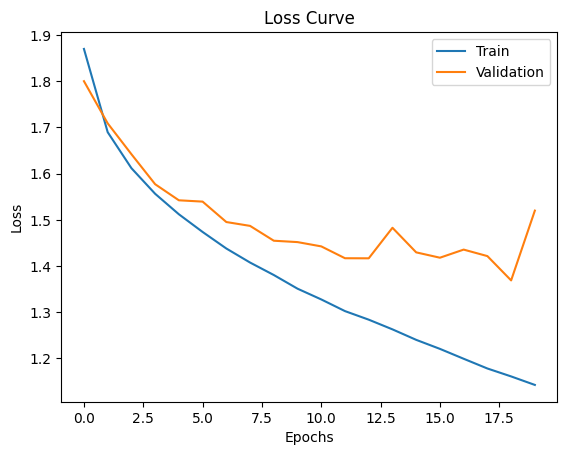

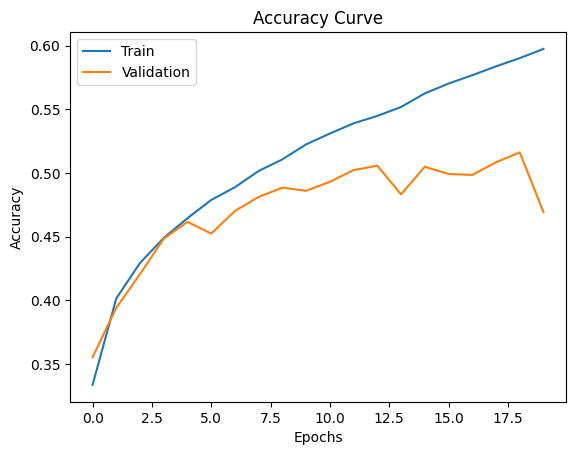

In [13]:
# Loss Curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Accuracy Curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.45      0.54      1000
           1       0.64      0.63      0.64      1000
           2       0.54      0.16      0.25      1000
           3       0.49      0.11      0.18      1000
           4       0.50      0.30      0.38      1000
           5       0.40      0.43      0.42      1000
           6       0.54      0.60      0.57      1000
           7       0.28      0.85      0.42      1000
           8       0.57      0.71      0.63      1000
           9       0.66      0.45      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.53      0.47      0.45     10000
weighted avg       0.53      0.47      0.45     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


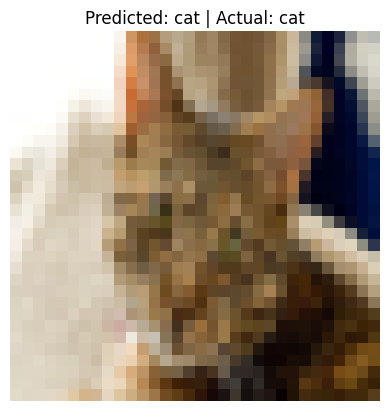

In [26]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

idx = np.random.randint(0, len(x_test))

img = x_test[idx].reshape(32,32,3)
input_img = x_test[idx].reshape(1, 32*32*3)

pred = model.predict(input_img)
pred_label = np.argmax(pred)

plt.imshow(img)
plt.title(f"Predicted: {class_names[pred_label]} | Actual: {class_names[y_test[idx]]}")
plt.axis('off')
plt.show()
